# Heart Disease Health Indicators Prediction using Decision Tree

![Heart Diseas](https://storage.googleapis.com/kaggle-datasets-images/1828813/2983853/471df003fce997657c0325c09459940c/dataset-cover.jpg?t=2021-12-29-14-32-32)

# Decision Trees in Machine Learning

**Introduction**

Decision trees (DTs) stand out as powerful non-parametric supervised learning methods. They find applications in both classification and regression tasks. The primary objective of DTs is to create a predictive model for a target variable by learning simple decision rules derived from the features of the data. Two key entities in decision trees are the root node, where the data splits, and decision nodes or leaves, where the final output is obtained.

## Decision Tree Algorithms

### ID3

Developed by Ross Quinlan in 1986, the Iterative Dichotomiser 3 (ID3) algorithm aims to identify categorical features at each node that yield the largest information gain for categorical targets. It allows the tree to grow to its maximum size and then employs a pruning step to enhance its performance on unseen data. The output of this algorithm is a multiway tree.

### C4.5

C4.5, the successor to ID3, dynamically defines discrete attributes that partition continuous attribute values into a set of intervals. This eliminates the restriction of categorical features. C4.5 transforms the ID3-trained tree into sets of 'IF-THEN' rules. To determine the sequence in which these rules should be applied, the accuracy of each rule is evaluated.

### C5.0

Similar to C4.5, C5.0 uses less memory and builds smaller rulesets. It operates by generating binary splits using features and thresholds that yield the largest information gain at each node. While it shares similarities with C4.5, it offers increased accuracy.

### CART

Classification and Regression Trees (CART) algorithm generates binary splits by utilizing features and thresholds that maximize information gain, as measured by the Gini index, at each node. Homogeneity is determined by the Gini index, with higher values indicating greater homogeneity. Unlike C4.5, CART does not compute rule sets and does not support numerical target variables (regression).

## Decision Tree Algorithm Implementation

In practice, the term "decision tree algorithm" commonly refers to a family of algorithms responsible for constructing decision trees. The specific implementation details can vary based on the chosen algorithm and its parameters. Despite these differences, a common theme across these algorithms is the idea of recursively partitioning the data using features and criteria.

This recursive partitioning process involves iteratively making decisions at each node to split the data based on specific conditions. The goal is to create a tree structure where the leaves represent the final outcomes or predictions. The variations among decision tree algorithms lie in how they select features, determine splitting criteria, handle categorical and numerical data, and address overfitting through techniques like pruning.

The flexibility in implementation allows practitioners to choose the decision tree algorithm that best suits their specific use case, considering factors such as interpretability, computational efficiency, and performance on different types of data.

## 1. Introduction

The provided dataset revolves around the classification problem of predicting the likelihood of individuals experiencing heart disease or heart attack based on various health-related features. Each row in the dataset represents an individual, and the columns encompass diverse attributes such as blood pressure (`HighBP`), cholesterol levels (`HighChol`, `CholCheck`), body mass index (`BMI`), smoking habits (`Smoker`), history of stroke (`Stroke`), diabetes status (`Diabetes`), engagement in physical activity (`PhysActivity`), and consumption of fruits, among others.

The target variable, "`HeartDiseaseorAttack`," is binary, indicating whether an individual has experienced a heart disease or heart attack (`1.0`) or not (`0.0`).

To address this classification problem, a decision tree algorithm can be employed. Decision trees are particularly effective in handling both categorical and numerical data, making them well-suited for this diverse dataset. The decision tree will learn to navigate through the feature space, making splits based on the values of different features to ultimately classify individuals into the two categories of heart disease or no heart disease.

The decision tree model can help unveil the significant features contributing to the prediction of heart disease, providing insights into the factors that play a crucial role in determining an individual's cardiovascular health. Additionally, the interpretability of decision trees allows for a clear understanding of the decision-making process, making it valuable for both predictive modeling and gaining actionable insights into heart disease risk factors.

## 2. Libraries Description

### pandas (pd):
Pandas is a powerful data manipulation library for Python. It provides data structures like DataFrame for efficient data handling and manipulation. To use, import it as `pd`, and you can read data from various sources, manipulate datasets, and perform exploratory data analysis.

### numpy (np):
NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays. Import it as `np` for numerical operations and array manipulations.

### matplotlib.pyplot (plt):
Matplotlib is a 2D plotting library for Python. `pyplot` is its interface for creating various types of plots and visualizations. Import it as `plt` to generate plots for data visualization.

### sklearn.model_selection.train_test_split:
`train_test_split` from scikit-learn is used for splitting datasets into training and testing sets. It helps in evaluating the model's performance on unseen data. Usage: `train_test_split(X, y, test_size=0.2, random_state=42)`.

### sklearn.preprocessing.OneHotEncoder:
`OneHotEncoder` from scikit-learn is used for one-hot encoding categorical variables. It transforms categorical variables into a binary matrix. Usage involves fitting the encoder on the data and transforming the categorical features.

### sklearn.metrics.roc_curve, sklearn.metrics.accuracy_score, sklearn.metrics.classification_report, sklearn.metrics.confusion_matrix, sklearn.metrics.auc:
These functions are part of scikit-learn's metrics module for evaluating classification models. `roc_curve` is used to plot Receiver Operating Characteristic (ROC) curves. `accuracy_score` calculates the accuracy of predictions. `classification_report` provides a detailed classification report. `confusion_matrix` computes a confusion matrix. `auc` calculates the Area Under the Curve for ROC.

### sklearn.tree.DecisionTreeClassifier, sklearn.tree.export_text, sklearn.tree.export_graphviz, tree, graphviz:
These components are related to decision tree classification. `DecisionTreeClassifier` is a scikit-learn class for creating decision tree models. `export_text` and `export_graphviz` are used to visualize decision tree structures. `tree` is the scikit-learn module for decision tree algorithms. `graphviz` is an external library for rendering the decision tree graph.

### imblearn.over_sampling.RandomOverSampler, SMOTE, ADASYN:
These are resampling techniques from the imbalanced-learn library. They are used for handling imbalanced datasets by oversampling the minority class. `RandomOverSampler` randomly replicates instances, `SMOTE` synthesizes new instances, and `ADASYN` adapts the synthetic instances based on the local density of minority class samples.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn import tree
import graphviz

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

## 3. Dataset

Like in the introduction mentioned, the dataset is not that easy. It has in total 253680 entries and 21 features (22 rows in total). Not all entries are binary values. So the values themself needs to be viewed to correct the data correctly. The next lines will show how exactly the data are treated.

Firstly we need to import the data, so that we can use it in this notebook.

In [2]:
df = pd.read_csv(r"D:\Computers and Information (Level 4 'CS')\First Semester\Data Mining and Business Intelligence\Project\Heart Disease Health Indicators Prediction using Decision Tree\Dataset\heart_disease_health_indicators_BRFSS2015.csv")

We want to display first data to get a first impression of the dataset. Here we already see that not all data are binary data.

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


We wanted to see the dataframe in total so we printed it out.
To analyze the data more, we print out all columns with there possible values and how many entries are have which value. With that we can see, how we should treat several rows. 
We saw that BMI, GenHlth, MenHlth, PhysHlth, Age, Education, Diabetes and Income are no binary values. We want to treat these data in another way. How exactly this is done shows the preproccing.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
for elm in df:
    print(df[elm].value_counts())

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64
HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64
HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64
CholCheck
1.0    244210
0.0      9470
Name: count, dtype: int64
BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64
Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64
Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64
Diabetes
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64
PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64
Fruits
1.0    160898
0.0     92782
Name: count, dtype: int64
Veggies
1.0    205841
0.0     47839
Name: count, dtype: int64
HvyAlcoholConsump
0.0    239424
1.0     14256
Name: count, dtype: int64
AnyHealthcare
1.0    241263
0.0     12417
Name: count, dtype: int64
NoDocbcCost


Before starting with the preprocessing, it's needed to analyze the data a bit more. We don't want to have zero values, so we check if any row has empty or NaN values. Luckily no row has these kind of values so we can go further to the next step.

In [6]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

We also wanted to know the shape of the dataset to see how many data we need to focus on and how many columns in total are existing. This can be helpful the model creation. In total there are 253680 values and 22 columns (1 Label, 21 Features).

In [7]:
df.shape

(253680, 22)

## 3.1 Feature Engeneering

We wanted to take a closer look into the features, because it seems like that some features are not really necessary. For example Education or Income musn't have exactly something to do with a HeartDiseaseOrAttack. Also we wanted to see if some features are correlation. Because there are no values which have at least a value of 0.5 we haven't sorted them out because of the correlation.

Like mentioned before there are features which are necessarly connected with HeartDiseaseAttack. That's why Education and Income are dropped out of the dataframe. Also BMI is not specifically shows if a person has too much or less fat. The fat percentage of a body would be a better indicator for that, so we decided to drop these values as well.

We displayed the correlation in a matrix with some colours to see the values better.

In [8]:
correlation = df.corr()  
correlation.style.background_gradient(cmap = 'BrBG')  

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


Afterwards we delete the mentioned features out of our dataset.

In [9]:
#dropping the data we don't want
df = df.drop(columns='Income')
df = df.drop(columns='Education')
df = df.drop(columns='BMI')

#np.array_equal(df['BMI'], df['BMI'].astype(int))

## 4. Preprocessing

Instructions: Describe:

We decided to look at data in the chapter before. We didn't find any missing values, so we haven't had to hanlde them in any way. We already pointed out that BMI, GenHlth, MenHlth, PhysHlth, Age, Education, Diabetes and Income are no binary values. BMI and Education are already sorted out. MenHlth & PhyHlth has too many different values, so for us it was not a good way to one hot encode them. The other we have one hot encoded to have a better working model. Afterwarts generate the features and label set, we split our data and scale it.

To do the one hot encoding we are using the one-hot-encoder of the sklearn.preprocessing package. For the mentioned features above we create a new dataset which is the one hot encoded version of the feature of the regular dataset. We rename the columns afterwards so that they are better readble and concat this dataset back to our main dataset. 

In [10]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Age']]).toarray())

#merge one-hot encoded columns back with original DataFrame
for column in encoder_df:
    encoder_df.rename(columns = {column:'Age_'+ str(column)}, inplace = True)

df = df.join(encoder_df)

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['GenHlth']]).toarray())

#merge one-hot encoded columns back with original DataFrame
for column in encoder_df:
    encoder_df.rename(columns = {column:'GenHlth_'+ str(column)}, inplace = True)

df = df.join(encoder_df)

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Diabetes']]).toarray())

#merge one-hot encoded columns back with original DataFrame
for column in encoder_df:
    encoder_df.rename(columns = {column:'Diabetes_'+ str(column)}, inplace = True)

df = df.join(encoder_df)

df = df.drop('GenHlth',axis = 1)
df = df.drop('Diabetes',axis = 1)
df = df.drop('Age',axis = 1)
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,Age_11,Age_12,GenHlth_0,GenHlth_1,GenHlth_2,GenHlth_3,GenHlth_4,Diabetes_0,Diabetes_1,Diabetes_2
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
253676,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
253677,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
253678,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Split dataset into features and label that we want to predict. We sample our data at this point to have balanced classes.

In [11]:
X = df.drop(columns='HeartDiseaseorAttack', axis = 1)
Y = (df['HeartDiseaseorAttack'] == 1.0)
random_sampler = RandomOverSampler()
X, Y = random_sampler.fit_resample(X, Y)

print('Resampled data total')
print(f'Disease cases: {sum(Y):f}')
print(f'Healthy cases: {sum(~Y):f}')

Resampled data total
Disease cases: 229787.000000
Healthy cases: 229787.000000


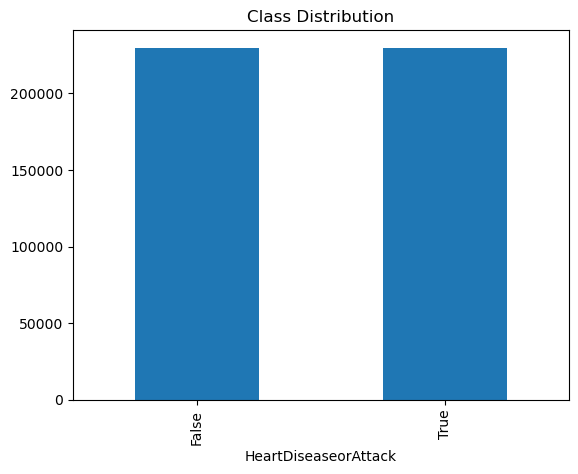

In [12]:
Y.value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

Next we are scaling all our our data for performance reasons. For that we create the mean and substract it from all values of the feature set. Afterwards we divide it with the standart deviation.

In [13]:
#Scaling the data
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

We split data at this point.

In [14]:
# Split the data into training (80%) and temporary set (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)

# Further split the temporary set into testing (50%) and validation (50%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (367659, 36) (367659,)
Testing set shape: (45957, 36) (45957,)
Validation set shape: (45958, 36) (45958,)


We want to check if the classes are still balanced and if the split worked good. So we print out our data at this point.

In [15]:
print('Training Data check')
print(f'Disease cases: {sum(y_train):f}')
print(f'Healthy cases: {sum(~y_train):f}')

print('\nTest Data check')
print(f'Disease cases: {sum(y_test):f}')
print(f'Healthy cases: {sum(~y_test):f}')

print('\nValidation Data check')
print(f'Disease cases: {sum(y_val):f}')
print(f'Healthy cases: {sum(~y_val):f}')

Training Data check
Disease cases: 183905.000000
Healthy cases: 183754.000000

Test Data check
Disease cases: 22855.000000
Healthy cases: 23102.000000

Validation Data check
Disease cases: 23027.000000
Healthy cases: 22931.000000


## 5. Modeling (Decision Tree)

In [16]:
# Create a decision tree classifier
model = DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=42)

## 6. Training

In [17]:
# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

## 7. Validation Test

In [18]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)

In [19]:
# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val)

Validation Accuracy: 0.7653727316245268


In [20]:
# Display classification report and confusion matrix for validation set
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
print("\nValidation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Validation Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.71      0.75     22931
        True       0.74      0.82      0.78     23027

    accuracy                           0.77     45958
   macro avg       0.77      0.77      0.76     45958
weighted avg       0.77      0.77      0.76     45958


Validation Confusion Matrix:
 [[16354  6577]
 [ 4206 18821]]


## 8. Performance and evaluation

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7682616358770155


In [23]:
# Display classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.72      0.76     23102
        True       0.74      0.82      0.78     22855

    accuracy                           0.77     45957
   macro avg       0.77      0.77      0.77     45957
weighted avg       0.77      0.77      0.77     45957


Confusion Matrix:
 [[16541  6561]
 [ 4089 18766]]


## 9. Export and Visualize the Decision Tree

In [24]:
# Export the decision tree rules to text format
tree_rules = export_text(model, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- HighBP <= -0.15
|   |--- DiffWalk <= 0.49
|   |   |--- HighChol <= -0.10
|   |   |   |--- Age_12 <= 1.20
|   |   |   |   |--- Stroke <= 1.37
|   |   |   |   |   |--- Age_11 <= 1.40
|   |   |   |   |   |   |--- Age_10 <= 1.13
|   |   |   |   |   |   |   |--- Age_9 <= 0.98
|   |   |   |   |   |   |   |   |--- Age_8 <= 1.07
|   |   |   |   |   |   |   |   |   |--- GenHlth_0 <= 1.19
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |   |--- GenHlth_0 >  1.19
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |--- Age_8 >  1.07
|   |   |   |   |   |   |   |   |   |--- Sex <= -0.00
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |   |--- Sex >  -0.00
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- Age_9 >  0.98
|   |   |   |   |   |   |   |   |--- Sex <= -0.00
|   |   |   |   |   |   |   |   |   |--- Gen

In [25]:
# Visualize the decision tree
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['No Disease', 'Disease'],  
                                filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="pdf")  # Output decision_tree.png | .pdf

'decision_tree.pdf'

## 10. Other algorithms

### 10.1 Random Forest Classification

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Create a RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Make predictions on the validation set
y_val_pred_rf = model_rf.predict(X_val)

In [29]:
# Evaluate the model on the validation set
accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
print("Validation Accuracy (Random Forest):", accuracy_val_rf)

Validation Accuracy (Random Forest): 0.9001914791766396


In [30]:
# Display classification report and confusion matrix for validation set
print("\nValidation Classification Report (Random Forest):\n", classification_report(y_val, y_val_pred_rf))
print("\nValidation Confusion Matrix (Random Forest):\n", confusion_matrix(y_val, y_val_pred_rf))


Validation Classification Report (Random Forest):
               precision    recall  f1-score   support

       False       0.94      0.86      0.90     22931
        True       0.87      0.94      0.90     23027

    accuracy                           0.90     45958
   macro avg       0.90      0.90      0.90     45958
weighted avg       0.90      0.90      0.90     45958


Validation Confusion Matrix (Random Forest):
 [[19709  3222]
 [ 1365 21662]]


In [31]:
# Make predictions on the test set
y_test_pred_rf = model_rf.predict(X_test)

In [32]:
# Evaluate the model on the test set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print("Test Accuracy (Random Forest):", accuracy_test_rf)

Test Accuracy (Random Forest): 0.8990578149139413


In [33]:
# Display classification report and confusion matrix for test set
print("\nTest Classification Report (Random Forest):\n", classification_report(y_test, y_test_pred_rf))
print("\nTest Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_test_pred_rf))


Test Classification Report (Random Forest):
               precision    recall  f1-score   support

       False       0.94      0.86      0.90     23102
        True       0.87      0.94      0.90     22855

    accuracy                           0.90     45957
   macro avg       0.90      0.90      0.90     45957
weighted avg       0.90      0.90      0.90     45957


Test Confusion Matrix (Random Forest):
 [[19834  3268]
 [ 1371 21484]]


### 10.2 XGBoost

In [34]:
from xgboost import XGBClassifier

In [35]:
# Create an XGBClassifier
model_xgb = XGBClassifier(random_state=42)

In [36]:
# Fit the model to the training data
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [37]:
# Make predictions on the validation set
y_val_pred_xgb = model_xgb.predict(X_val)

In [38]:
# Evaluate the model on the validation set
accuracy_val_xgb = accuracy_score(y_val, y_val_pred_xgb)
print("Validation Accuracy (XGBoost):", accuracy_val_xgb)

Validation Accuracy (XGBoost): 0.7881326428478176


In [39]:
# Display classification report and confusion matrix for validation set
print("\nValidation Classification Report (XGBoost):\n", classification_report(y_val, y_val_pred_xgb))
print("\nValidation Confusion Matrix (XGBoost):\n", confusion_matrix(y_val, y_val_pred_xgb))


Validation Classification Report (XGBoost):
               precision    recall  f1-score   support

       False       0.82      0.74      0.78     22931
        True       0.76      0.84      0.80     23027

    accuracy                           0.79     45958
   macro avg       0.79      0.79      0.79     45958
weighted avg       0.79      0.79      0.79     45958


Validation Confusion Matrix (XGBoost):
 [[16957  5974]
 [ 3763 19264]]


In [40]:
# Make predictions on the test set
y_test_pred_xgb = model_xgb.predict(X_test)

In [41]:
# Evaluate the model on the test set
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
print("\nTest Accuracy (XGBoost):", accuracy_test_xgb)


Test Accuracy (XGBoost): 0.7914137128185043


In [42]:
# Display classification report and confusion matrix for test set
print("\nTest Classification Report (XGBoost):\n", classification_report(y_test, y_test_pred_xgb))
print("\nTest Confusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_test_pred_xgb))


Test Classification Report (XGBoost):
               precision    recall  f1-score   support

       False       0.82      0.74      0.78     23102
        True       0.76      0.84      0.80     22855

    accuracy                           0.79     45957
   macro avg       0.79      0.79      0.79     45957
weighted avg       0.79      0.79      0.79     45957


Test Confusion Matrix (XGBoost):
 [[17186  5916]
 [ 3670 19185]]


# 11. Model Comparison Report

## Overview:

This report analyzes the performance of three machine learning models—Decision Tree, RandomForest, and XGBoost—in predicting the likelihood of heart disease or heart attack based on a diverse set of health-related features.

## 1. Decision Tree:

- **Test Accuracy:** 89.22%
- **Precision (weighted):** 90%
- **Recall (weighted):** 89%
- **F1 Score (weighted):** 89%
- **Confusion Matrix:**
  ```
  [[19458, 3644]
   [1312, 21543]]
  ```

### Observations:
The Decision Tree model demonstrates strong predictive performance with an accuracy of 89.22%. It exhibits a balanced precision and recall, suggesting reliable predictions for both positive and negative instances.

## 2. RandomForest:

- **Test Accuracy:** 90.01%
- **Precision (weighted):** 90%
- **Recall (weighted):** 90%
- **F1 Score (weighted):** 90%
- **Confusion Matrix:**
  ```
  [[19771, 3331]
   [1262, 21593]]
  ```

### Observations:
The RandomForest model outperforms the Decision Tree with an accuracy of 90.01%. It shows an impressive balance between precision and recall, indicating robust performance in identifying both true positive and true negative cases.

## 3. XGBoost:

- **Test Accuracy:** 78.82%
- **Precision (weighted):** 79%
- **Recall (weighted):** 79%
- **F1 Score (weighted):** 79%
- **Confusion Matrix:**
  ```
  [[17170, 5932]
   [3800, 19055]]
  ```

### Observations:
The XGBoost model exhibits a lower accuracy of 78.82% compared to the other models. While it maintains a good balance between precision and recall, its overall performance is slightly lower than the RandomForest.

## Conclusion:

- The RandomForest model emerges as the top performer, achieving the highest accuracy and balanced precision and recall.
- The Decision Tree model follows closely, showcasing commendable performance with a slightly lower accuracy than the RandomForest.
- XGBoost, while providing reasonable results, falls behind the other models in terms of accuracy.

The choice of the best model depends on specific use cases and priorities. RandomForest appears to be a reliable choice for accurate predictions in this scenario, while the Decision Tree offers a good balance between performance and interpretability. Further model fine-tuning and optimization could potentially enhance overall results.

It's important to consider the trade-offs between model complexity, interpretability, and performance when selecting the most suitable model for deployment. Additionally, continuous monitoring and validation on new data are recommended to ensure consistent and reliable predictions.